# Analyzing Helicopter Prison Escapes

## Introduction

Imagine a daring prison escape, with a helicopter swooping in to free the inmates. It's a dramatic scene often depicted in movies and television shows, but does it happen in real life? Surprisingly, helicopter prison escapes do occur, and in this project, we will delve into the data to uncover interesting patterns.

The dataset is pulled from the Wikipedia page ["List of helicopter prison escapes"](https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes).  It spans the years 1971 - 2020 and includes the exact date, prison name, country, name of escapees, and a text description of the escape.  By analyzing the number of attempts made per year since 1971 and examining the countries where these attempts are most prevalent, we aim to gain insights into the world of helicopter prison escapes. 

## Get the Data

Our first step is to import the data and get a look at it.  We'll be importing it from the Wikipedia page mentioned above.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes'

# Import from url
escapes = pd.read_html(url)[1]

# Check the results
escapes.head()

,Date,Prison name,Country,Succeeded,Escapee(s),Details
0,"August 19, 1971",Santa Martha Acatitla,Mexico,Yes,Joel David Kaplan Carlos Antonio Contreras Castro,Joel David Kaplan was a New York businessman w...
1,"October 31, 1973",Mountjoy Jail,Ireland,Yes,JB O'Hagan Seamus Twomey Kevin Mallon,"On October 31, 1973, an IRA member hijacked a ..."
2,"May 24, 1978","United States Penitentiary, Marion",United States,No,Garrett Brock Trapnell Martin Joseph McNally J...,43-year-old Barbara Ann Oswald hijacked a Sain...
3,"February 27, 1981","Fleury-Mérogis, Essonne, Ile de France",France,Yes,Gérard Dupré Daniel Beaumont,"With the help of Serge Coutel, Gérard Dupré an..."
4,"May 7, 1981","Orsainville Prison, Quebec City",Canada,No,Marina Paquet (hijacker) Giles Arseneault (pri...,Marina Paquet held a sawed off shotgun against...


In [3]:
escapes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         48 non-null     object
 1   Prison name  48 non-null     object
 2   Country      48 non-null     object
 3   Succeeded    48 non-null     object
 4   Escapee(s)   48 non-null     object
 5   Details      48 non-null     object
dtypes: object(6)
memory usage: 2.4+ KB


In [4]:
escapes.describe()

,Date,Prison name,Country,Succeeded,Escapee(s),Details
count,48,48,48,48,48,48
unique,48,45,15,2,40,48
top,"August 19, 1971",Luynes prison,France,Yes,—,Joel David Kaplan was a New York businessman w...
freq,1,2,15,34,7,1


## Removing the Details

The dataset contains 48 rows and 6 columns.  The last column, "Details" contains a lot of text and we won't be using it, so we can drop it. 

In [5]:
escapes.drop('Details',axis = 1,inplace = True)
escapes.head()

,Date,Prison name,Country,Succeeded,Escapee(s)
0,"August 19, 1971",Santa Martha Acatitla,Mexico,Yes,Joel David Kaplan Carlos Antonio Contreras Castro
1,"October 31, 1973",Mountjoy Jail,Ireland,Yes,JB O'Hagan Seamus Twomey Kevin Mallon
2,"May 24, 1978","United States Penitentiary, Marion",United States,No,Garrett Brock Trapnell Martin Joseph McNally J...
3,"February 27, 1981","Fleury-Mérogis, Essonne, Ile de France",France,Yes,Gérard Dupré Daniel Beaumont
4,"May 7, 1981","Orsainville Prison, Quebec City",Canada,No,Marina Paquet (hijacker) Giles Arseneault (pri...


## Total Attempts and Percent of Successful Attempts

To get an overall sense of the data, let's find out the overall number of attempts, the number of successful ones and the success rate. 

In [6]:
# Calculate the total from the length of dataframe = total rows
total_attempts = len(escapes)

# Get count of successes: Extract "Yes" value from Value counts of `Succeeded` column
successful_escapes = int(escapes["Succeeded"].value_counts()["Yes"])

# Calculate success rate
percent_successful = round((successful_escapes/total_attempts)*100,0)

# Output results
print('-----------------------------------')
print(f"{'Total Attempts:':<20} {total_attempts:>10}")
print(f"{'Successful Escapes:':<20} {successful_escapes:>10}")
print(f"{'Success Rate:':<20} {percent_successful:>10} %")
print('-----------------------------------')

-----------------------------------
Total Attempts:              48
Successful Escapes:          34
Success Rate:              71.0 %
-----------------------------------


An average of nearly 1 attempt per year and a success rate of almost 71%. That is rather impressive!

## Attempts Per Year

Now we'll begin taking a more granular look at the data, beginning with the number of escapes per year. Since the dates in the `Date` column are uniform, we can use string slicing to extract the last 4 characters of each string. Then we can create a pivot table to get the count of attempts per year.  Since there are some years with no attempts, we'll add those years to the pivot table with a count of zero. 

In [7]:
# Exctract Year as new column
escapes["Year"] = escapes["Date"].str.slice(start = -4)

# Get totals of success/failure by year
attempts_by_year = pd.pivot_table(
    escapes,
    index = ['Year'],
    aggfunc = 'size',
    fill_value = 0)

# Get starting and ending year
min_year = int(attempts_by_year.index.min())
max_year = int(attempts_by_year.index.max())

# Create list of all years between min and max
years = []
for y in range(min_year, max_year + 1):
     years.append(str(y))  #if you don't make it a string, all lines will come out NaN. 
        
#reindex the series to add missing years
attempts_by_year = attempts_by_year.reindex(years,fill_value = 0) 
attempts_by_year = attempts_by_year.sort_index(ascending = True) #reorder to make graph in ascending order
attempts_by_year

# Print results
attempts_by_year

Year
1971    1
1972    0
1973    1
1974    0
1975    0
1976    0
1977    0
1978    1
1979    0
1980    0
1981    2
1982    0
1983    1
1984    0
1985    2
1986    3
1987    1
1988    1
1989    2
1990    1
1991    1
1992    2
1993    1
1994    0
1995    0
1996    1
1997    1
1998    0
1999    1
2000    2
2001    3
2002    2
2003    1
2004    0
2005    2
2006    1
2007    3
2008    0
2009    3
2010    1
2011    0
2012    1
2013    2
2014    1
2015    0
2016    1
2017    0
2018    1
2019    0
2020    1
dtype: int64

There have been between 0 and 3 attempts per year. It appears that mostly there was only one attempt per year with a smattering of years with 2 and 3.  Let's find out the actual breakdown. 

In [8]:
# Calculate Totals
attempts_by_year.value_counts()

1    20
0    18
2     8
3     4
dtype: int64

In [9]:
# Calculate Percentages
attempts_by_year.value_counts(dropna=False,normalize = True)

1    0.40
0    0.36
2    0.16
3    0.08
dtype: float64

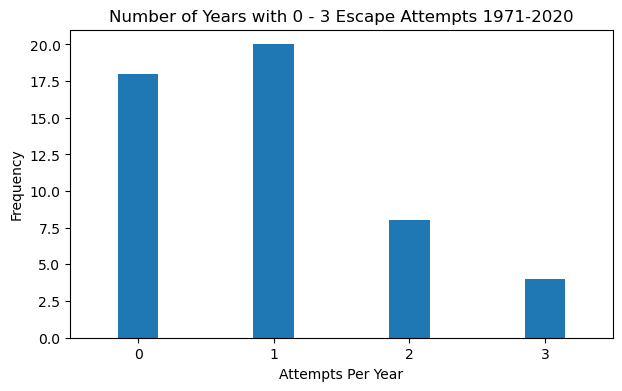

In [26]:
#Create Histogram
attempts_by_year.plot.hist(figsize = (7,4),bins = np.arange(5)-.15,width = .3) 
    # using this arange and width centers bars on xticks
    # using arange(4) cuts off bar for 3. Have to bump up to 5

# Format the chart
plt.title("Number of Years with 0 - 3 Escape Attempts 1971-2020")
plt.xticks(range(4))  # gets rid of half-steps
plt.xlim((-.5,3.5)) #gets rid of white space made by using np.arange(4)
plt.xlabel("Attempts Per Year")

plt.show()

Only 18 of 50 years (36%) saw no escape attempts. As expected, 20 years with an attempt there was only one.  Nearly half as many (8) had 2 attempts, and half again (4) had 3.  As difficult and rare as such events occur, it's unsurprising to see such an inverse correlation.   

## Visualizing Attempts Per Year

Now we'll plot the attempts per year so we can better see how they're distributed.

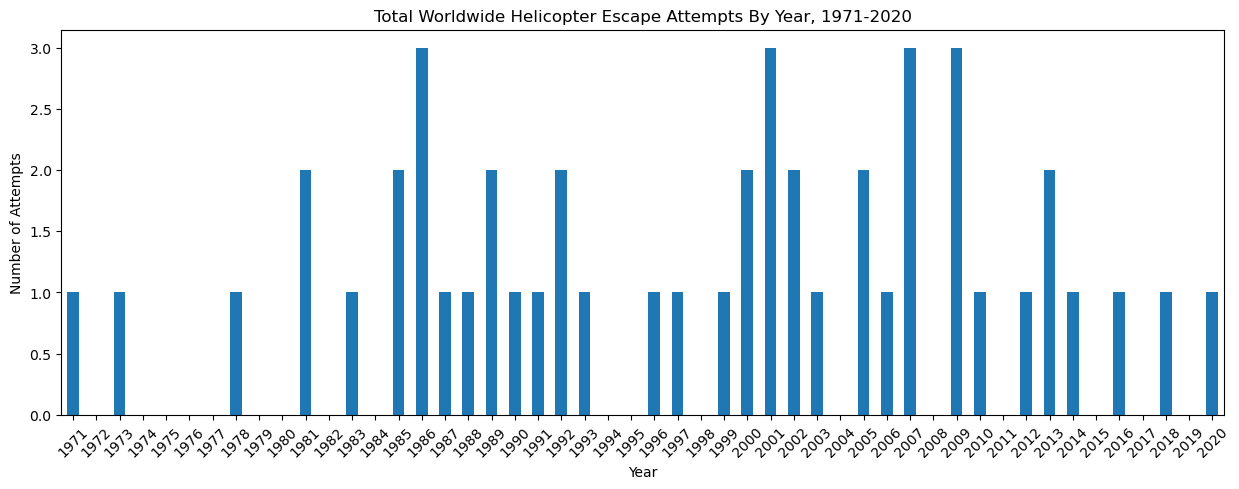

In [24]:
# Create bar chart from pivot table
attempts_by_year.plot.bar(figsize = (15,5))

# Format
plt.title("Total Worldwide Helicopter Escape Attempts By Year, 1971-2020")
plt.ylabel("Number of Attempts")
plt.xlabel("Year")
plt.xticks(rotation = 45)

plt.show()

We can also highlight successful vs unsuccessful attempts

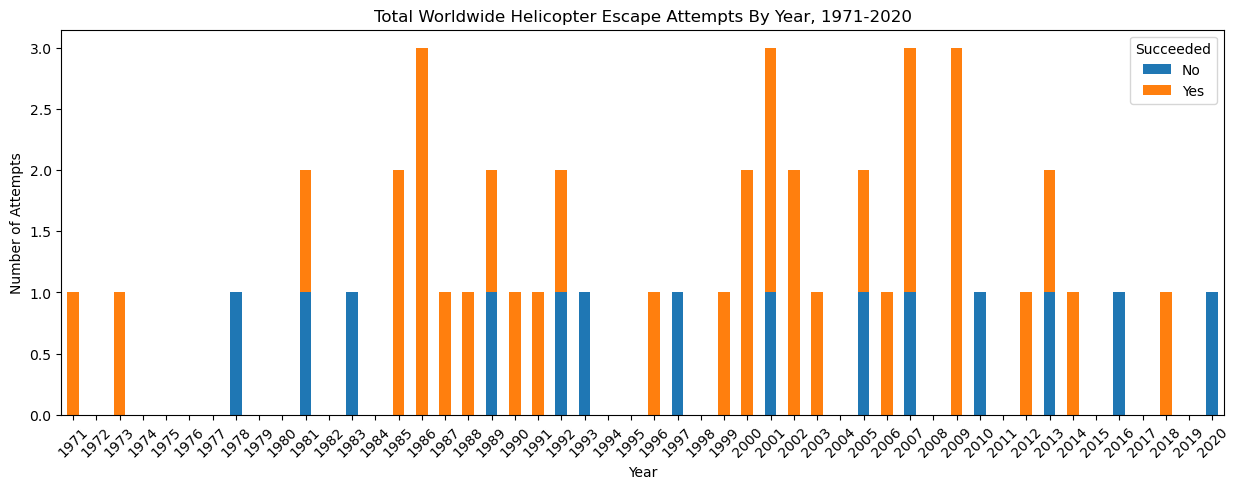

In [23]:
# Get totals of success/failure by year
attempts_by_year2 = pd.pivot_table(
    escapes,
    index = ['Year'],
    columns = ['Succeeded'],
    aggfunc = 'size',
    fill_value = 0)

# Get starting and ending year
min_year = int(attempts_by_year2.index.min())
max_year = int(attempts_by_year2.index.max())

# Create list of all years between min and max
years = []
for y in range(min_year, max_year + 1):
     years.append(str(y))  #if you don't make it a string, all lines will come out NaN. 
        
#reindex the series to add missing years
attempts_by_year2 = attempts_by_year2.reindex(years) 
attempts_by_year2 = attempts_by_year2.sort_index(ascending = True) #reorder to make graph in ascending order
attempts_by_year2

#Graph the result
attempts_by_year2.plot.bar(stacked = True,figsize = (15,5))

plt.title("Total Worldwide Helicopter Escape Attempts By Year, 1971-2020")
plt.ylabel("Number of Attempts")
plt.xlabel("Year")
plt.xticks(rotation = 45)

plt.show()

The years with the most attempts are a tie between 1986, 2001, 2007, and 2009, all with 3 attempts. There were only 3 in the 1970s. The number appears to increase each decade into the 2000s, when we see 3 of the years with 3 attempts, then drops off in the 2010s. It might be interesting to research why there was such a peak in the first decade of the century and then a decline in the second.  

## Attempts by Country

Next, let's look at how the attempts have been distributed by country.  

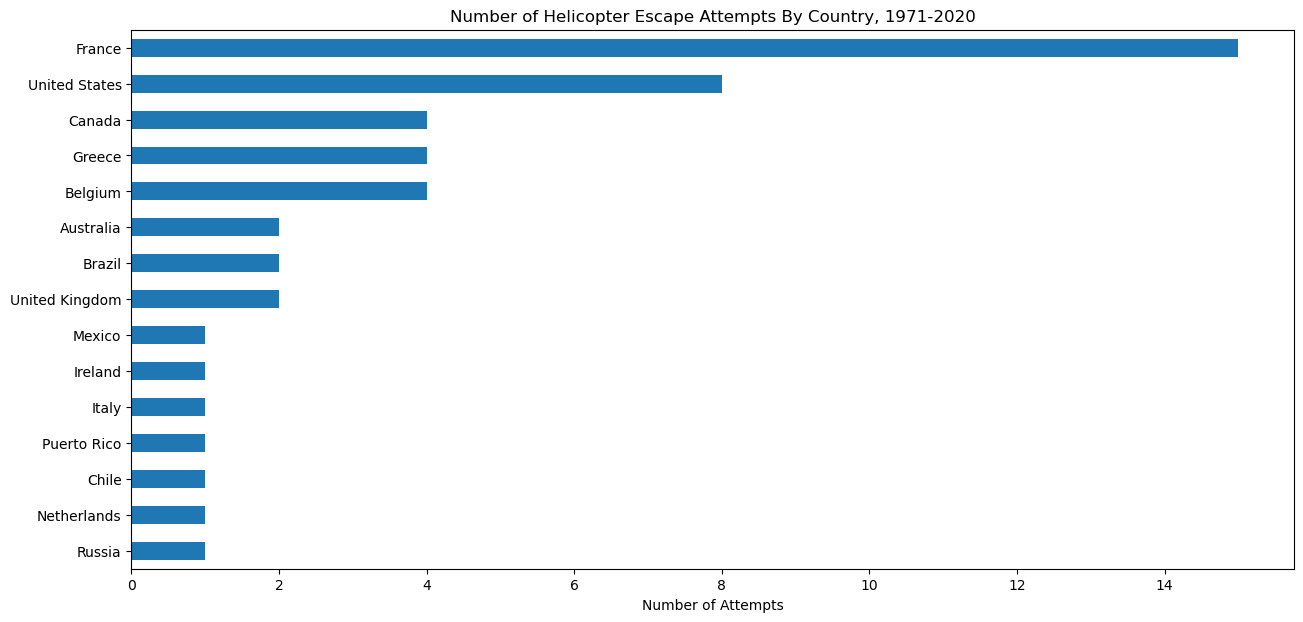

In [13]:
# Get the counts by country
attempts_by_country = escapes["Country"].value_counts()
attempts_by_country

# Plot the result
attempts_by_country.plot.barh(figsize = (15,7))

# Format
plt.title("Number of Helicopter Escape Attempts By Country, 1971-2020")
plt.xlabel("Number of Attempts")
plt.gca().invert_yaxis()  #Puts country with the highest count at top

plt.show()

France is the clear leader with 15 attempts, followed by the US with 8.  No other country on the list has more than 4 attempts. 

## Successful Attempts by Country

Now we'll dig a little deeper to determine in which countries helicopter prison breaks have a higher chance of success. We know from earlier that the overall success rate was just shy of 71% so we'll use that as our benchmark 

In [14]:
# Get counts of Yes and No by country
success_rate_by_country = pd.pivot_table(
    escapes,
    index = ['Country'],
    columns = ['Succeeded'],
    aggfunc = 'size',
    fill_value = 0)

# Add Column for Total Attempts
success_rate_by_country['Total'] = success_rate_by_country[['No','Yes']].sum(axis = 1)

# Calculate percent of successful attempts and round to 0 decimal points
success_rate_by_country['Success Rate'] = round(success_rate_by_country['Yes']/success_rate_by_country['Total']*100,0)

In [15]:
success_rate_by_country.sort_values("Success Rate",ascending = False)

Succeeded,No,Yes,Total,Success Rate
Country,,,,
Brazil,0,2,2,100.0
Chile,0,1,1,100.0
Ireland,0,1,1,100.0
Italy,0,1,1,100.0
Mexico,0,1,1,100.0
Puerto Rico,0,1,1,100.0
Russia,0,1,1,100.0
Canada,1,3,4,75.0
United States,2,6,8,75.0


Countries with only 1 or 2 attempts skew our results. Let's look at just countries with 4 or more. Then we can take a look at the average success rate for countries with fewer. 

In [16]:
success_rate_by_country[success_rate_by_country['Total'] >= 4].sort_values("Success Rate",ascending = False)

Succeeded,No,Yes,Total,Success Rate
Country,,,,
Canada,1,3,4,75.0
United States,2,6,8,75.0
France,4,11,15,73.0
Belgium,2,2,4,50.0
Greece,2,2,4,50.0


Since countries with only 1 attempt can only have 2 values, 0% and 100%, Countries with 3 can only be 0%, 50%, or 100%, let's average the values and create a line plot.

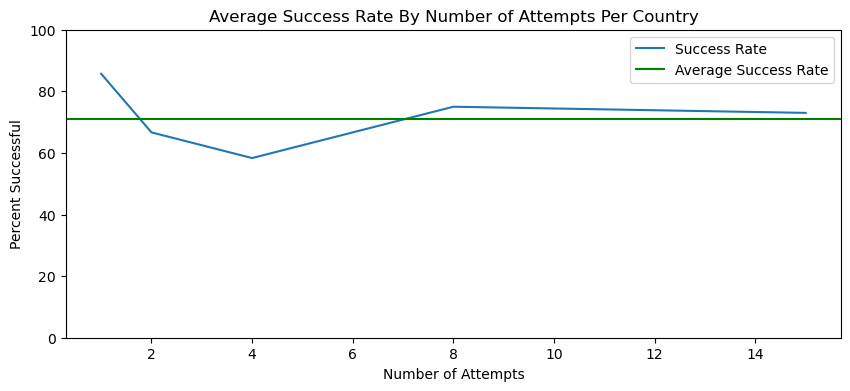

In [29]:
average_success_by_number_of_attempts = success_rate_by_country.groupby("Total")["Success Rate"].mean()
average_success_by_number_of_attempts

# Plot
average_success_by_number_of_attempts.plot(figsize = (10,4))

# Formatting
plt.title('Average Success Rate By Number of Attempts Per Country')
plt.xlabel('Number of Attempts')
plt.ylabel('Percent Successful')
plt.ylim(0,100)
plt.axhline(percent_successful,color = 'green',label = "Average Success Rate")
plt.legend()

plt.show()

Based on this graph, it would seem that the first attempt in a country has the highest chance of success at about 85%. Perhaps the element of surprise plays a role.  As the number of attempts goes up, the success rate falls into the 60% range, then rebounds and appears to start stablizing around the mean. It would be interesting to see if this would hold with more data.  

## Conclusion

While helicopter prison escapes are relatively rare, they have taken place on multiple occasions, according to the available data. With 48 attempts documented between 1971 and 2020, these escapes occur sporadically, with varying numbers each year. Although the dataset is limited, we have managed to uncover some intriguing statistics and trends.

Two countries, the United States and France, stand out with the highest number of attempts, accounting for more than four each. Furthermore, our analysis indicates that the United States and Canada have a higher likelihood of successful helicopter escapes, with a success rate of 75%. This rate surpasses the overall average success rate of approximately 71%.

Examining the success rate based on the number of attempts per country, we observe an interesting pattern. Countries with only one attempt tend to have the highest success rate, averaging around 85%. However, as the number of attempts increases, the success rate initially drops to 58%, before gradually recovering and stabilizing around 75%. Although the data is limited for these higher attempt numbers, this trend suggests that the success rate may converge toward the overall average in a larger dataset.

It is important to note that this analysis is based on a relatively small sample size, and the available data may not provide a comprehensive picture of all helicopter prison escapes. The Wikipedia page used as a source acknowledges that the list is incomplete. With more extensive and complete data, we could potentially draw more robust conclusions.

In summary, while orchestrating a helicopter escape from prison is undoubtedly challenging, the data suggests that it can be a viable option. With an average success rate of over 70%, these daring attempts demonstrate the determination and ingenuity of those seeking their freedom. Though helicopter escapes have been on the decline since the early 2000s, the recent arrival of relatively inexpensive personal quadcopters on the market will only make them more accessible, so prison officials would do well to analyze data such as this to  prevent and discourage inmates from attempting airborne escapes. 